## Setups and imports

**Imports**

In [117]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import seaborn as sns

from scipy.stats import zscore
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.neighbors import NearestNeighbors

**Dataset loading and opening**

In [118]:
# Dataset
data = pd.DataFrame(pd.read_csv('data.csv'))
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,country,dateload,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2


In [119]:
data.shape

(7188, 282)

In [120]:
data.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91A,Q91I,Q91E,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
count,7188.000000,7188.000000,7.188000e+03,7188.000000,7188.000000,7.188000e+03,7188.000000,7188.000000,7.188000e+03,7188.000000,...,7188.000000,7188.000000,7.188000e+03,7.188000e+03,7.188000e+03,7.188000e+03,7188.000000,7188.000000,7.188000e+03,7188.000000
mean,3.716055,45.990818,1.232196e+04,3.428492,45.722593,1.886704e+04,3.458125,45.902476,1.830787e+04,3.166388,...,2.391208,45.521842,5.617112e+03,1.563320e+03,1.516260e+03,2.903364e+03,1.623678,1.306483,1.235132e+03,1.626461
std,1.488674,26.271732,5.754300e+05,1.478393,26.609030,9.836502e+05,1.512086,26.115185,1.014611e+06,1.507506,...,1.443135,26.174255,4.089489e+04,3.103143e+04,2.526853e+04,9.832530e+04,0.562876,0.465868,1.023245e+05,0.856315
min,1.000000,1.000000,5.330000e+02,1.000000,1.000000,5.000000e+02,1.000000,1.000000,5.070000e+02,1.000000,...,1.000000,1.000000,5.130000e+02,1.000000e+00,1.480000e+02,2.000000e+00,0.000000,0.000000,1.400000e+01,0.000000
25%,2.000000,23.000000,2.992000e+03,2.000000,22.000000,2.366750e+03,2.000000,23.000000,3.426000e+03,2.000000,...,1.000000,23.000000,2.539750e+03,3.000000e+00,3.050000e+02,1.400000e+01,1.000000,1.000000,1.800000e+01,1.000000
50%,4.000000,45.000000,3.912500e+03,4.000000,45.000000,3.100000e+03,4.000000,46.000000,4.605500e+03,3.000000,...,2.000000,45.000000,3.410000e+03,7.000000e+00,3.820000e+02,1.800000e+01,2.000000,1.000000,2.200000e+01,1.000000
75%,5.000000,69.000000,5.285000e+03,5.000000,69.000000,4.265250e+03,5.000000,69.000000,6.433750e+03,5.000000,...,4.000000,68.000000,4.805000e+03,3.600000e+01,5.080000e+02,2.400000e+01,2.000000,2.000000,3.000000e+01,2.000000
max,5.000000,91.000000,4.876287e+07,5.000000,91.000000,8.050821e+07,5.000000,91.000000,8.601586e+07,5.000000,...,5.000000,91.000000,3.053623e+06,1.902817e+06,1.405436e+06,6.376603e+06,3.000000,2.000000,8.675309e+06,3.000000


## Data quality handling

**Missing Values**

Assess the number of missing values:

In [75]:
# Check for missing values
columns = data.columns
for name in columns:
    print(f"{name}: {data[name].isna().unique()}")

Q1A: [False]
Q1I: [False]
Q1E: [False]
Q2A: [False]
Q2I: [False]
Q2E: [False]
Q3A: [False]
Q3I: [False]
Q3E: [False]
Q4A: [False]
Q4I: [False]
Q4E: [False]
Q5A: [False]
Q5I: [False]
Q5E: [False]
Q6A: [False]
Q6I: [False]
Q6E: [False]
Q7A: [False]
Q7I: [False]
Q7E: [False]
Q8A: [False]
Q8I: [False]
Q8E: [False]
Q9A: [False]
Q9I: [False]
Q9E: [False]
Q10A: [False]
Q10I: [False]
Q10E: [False]
Q11A: [False]
Q11I: [False]
Q11E: [False]
Q12A: [False]
Q12I: [False]
Q12E: [False]
Q13A: [False]
Q13I: [False]
Q13E: [False]
Q14A: [False]
Q14I: [False]
Q14E: [False]
Q15A: [False]
Q15I: [False]
Q15E: [False]
Q16A: [False]
Q16I: [False]
Q16E: [False]
Q17A: [False]
Q17I: [False]
Q17E: [False]
Q18A: [False]
Q18I: [False]
Q18E: [False]
Q19A: [False]
Q19I: [False]
Q19E: [False]
Q20A: [False]
Q20I: [False]
Q20E: [False]
Q21A: [False]
Q21I: [False]
Q21E: [False]
Q22A: [False]
Q22I: [False]
Q22E: [False]
Q23A: [False]
Q23I: [False]
Q23E: [False]
Q24A: [False]
Q24I: [False]
Q24E: [False]
Q25A: [False]
Q25I:

In [76]:
print(f"Country att/>ribute null sum: {data['country'].isna().sum()}")
print(f"Unique values in country column: {data['country'].unique()}")

Country att/>ribute null sum: 2
Unique values in country column: ['US' 'AU' 'BR' 'CZ' 'CA' 'MX' 'IN' 'GB' 'PH' 'NONE' 'DE' 'PY' 'FI' 'GR'
 'SG' 'PL' 'OM' 'NZ' 'MY' 'KR' 'SK' 'RO' 'ID' 'PE' 'IT' 'CY' 'UA' 'LT'
 'KY' 'SE' 'RS' 'NL' 'FR' 'TT' 'RU' 'HR' 'IE' 'ZA' 'AL' 'HU' 'BE' 'PT'
 'CO' 'HN' 'MN' 'GH' 'JP' 'AE' 'BA' 'CR' 'LK' 'NO' 'VN' 'AT' 'CL' 'JM'
 'CH' 'DK' 'TR' 'ES' 'AR' 'BN' 'NG' 'TH' 'CN' 'EC' 'GE' 'TW' 'SI' 'HK'
 'BG' 'UY' 'MU' 'LV' 'PK' 'AG' 'GU' 'KE' 'EG' 'IS' 'IL' 'KZ' 'DZ' 'BY'
 'SA' 'SC' 'ME' 'MA' 'MT' 'BS' 'MK' 'ZM' 'TZ' 'SV' 'JO' 'BH' 'LB' 'VE'
 'AX' 'AM' 'ZW' nan 'LU' 'EE' 'MD' 'NP' 'SO' 'TN' 'KW' 'QA' 'PA' 'BB' 'JE'
 'GI' 'PR' 'GT' 'AZ' 'TC' 'KN' 'SY' 'DO' 'RW']


In [77]:
print(Counter(data['country']))

Counter({'US': 3417, 'GB': 517, 'CA': 448, 'AU': 323, 'DE': 193, 'NONE': 185, 'IN': 150, 'PH': 127, 'ID': 109, 'BR': 91, 'PL': 91, 'RO': 77, 'MY': 76, 'NL': 74, 'NZ': 70, 'FR': 68, 'SE': 65, 'FI': 63, 'SG': 62, 'IT': 58, 'RU': 48, 'PT': 41, 'ES': 38, 'NO': 35, 'IE': 34, 'MX': 32, 'ZA': 31, 'GR': 27, 'CZ': 26, 'DK': 26, 'TR': 26, 'RS': 25, 'BE': 24, 'AR': 24, 'HR': 23, 'CH': 22, 'HU': 21, 'LT': 19, 'NG': 19, 'PK': 17, 'JP': 16, 'AT': 16, 'KE': 16, 'UA': 15, 'HK': 15, 'TH': 14, 'VN': 13, 'SI': 13, 'BG': 13, 'CN': 10, 'IL': 10, 'SK': 9, 'AE': 9, 'KR': 8, 'CO': 8, 'CL': 8, 'BY': 8, 'LB': 8, 'PY': 7, 'GE': 7, 'MA': 6, 'TT': 5, 'AL': 5, 'BA': 5, 'CR': 5, 'JM': 5, 'TW': 5, 'DZ': 5, 'SA': 5, 'PE': 4, 'EC': 4, 'MK': 4, 'EE': 4, 'MN': 3, 'LV': 3, 'EG': 3, 'ME': 3, 'BS': 3, 'VE': 3, 'AM': 3, 'MD': 3, 'NP': 3, 'CY': 2, 'KY': 2, 'HN': 2, 'LK': 2, 'BN': 2, 'UY': 2, 'MU': 2, 'IS': 2, 'MT': 2, 'ZM': 2, nan: 2, 'QA': 2, 'PA': 2, 'GT': 2, 'OM': 1, 'GH': 1, 'AG': 1, 'GU': 1, 'KZ': 1, 'SC': 1, 'TZ': 1, 'S

The total number of missing values in 187, which is around 2.6% of the total dataset. We conclude that dropping the missing values will not have significant impact.

In [78]:
data = data.dropna()

for country in data['country']:
    idx = data[data['country']=='NONE'].index
    data = data.drop(idx)

In [79]:
print(f"Country att/>ribute null sum: {data['country'].isna().sum()}")
print(f"Unique values in country column: {data['country'].unique()}")

Country att/>ribute null sum: 0
Unique values in country column: ['US' 'AU' 'BR' 'CZ' 'CA' 'MX' 'IN' 'GB' 'PH' 'DE' 'PY' 'FI' 'GR' 'SG'
 'PL' 'OM' 'NZ' 'MY' 'KR' 'SK' 'RO' 'ID' 'PE' 'IT' 'CY' 'UA' 'LT' 'KY'
 'SE' 'RS' 'NL' 'FR' 'TT' 'RU' 'HR' 'IE' 'ZA' 'AL' 'HU' 'BE' 'PT' 'CO'
 'HN' 'MN' 'GH' 'JP' 'AE' 'BA' 'CR' 'LK' 'NO' 'VN' 'AT' 'CL' 'JM' 'CH'
 'DK' 'TR' 'ES' 'AR' 'BN' 'NG' 'TH' 'CN' 'EC' 'GE' 'TW' 'SI' 'HK' 'BG'
 'UY' 'MU' 'LV' 'PK' 'AG' 'GU' 'KE' 'EG' 'IS' 'IL' 'KZ' 'DZ' 'BY' 'SA'
 'SC' 'ME' 'MA' 'MT' 'BS' 'MK' 'ZM' 'TZ' 'SV' 'JO' 'BH' 'LB' 'VE' 'AX'
 'AM' 'ZW' 'LU' 'EE' 'MD' 'NP' 'SO' 'TN' 'KW' 'QA' 'PA' 'BB' 'JE' 'GI'
 'PR' 'GT' 'AZ' 'TC' 'KN' 'SY' 'DO' 'RW']


In [80]:
print(Counter(data['country']))

Counter({'US': 3417, 'GB': 517, 'CA': 448, 'AU': 323, 'DE': 193, 'IN': 150, 'PH': 127, 'ID': 109, 'BR': 91, 'PL': 91, 'RO': 77, 'MY': 76, 'NL': 74, 'NZ': 70, 'FR': 68, 'SE': 65, 'FI': 63, 'SG': 62, 'IT': 58, 'RU': 48, 'PT': 41, 'ES': 38, 'NO': 35, 'IE': 34, 'MX': 32, 'ZA': 31, 'GR': 27, 'CZ': 26, 'DK': 26, 'TR': 26, 'RS': 25, 'BE': 24, 'AR': 24, 'HR': 23, 'CH': 22, 'HU': 21, 'LT': 19, 'NG': 19, 'PK': 17, 'JP': 16, 'AT': 16, 'KE': 16, 'UA': 15, 'HK': 15, 'TH': 14, 'VN': 13, 'SI': 13, 'BG': 13, 'CN': 10, 'IL': 10, 'SK': 9, 'AE': 9, 'KR': 8, 'CO': 8, 'CL': 8, 'BY': 8, 'LB': 8, 'PY': 7, 'GE': 7, 'MA': 6, 'TT': 5, 'AL': 5, 'BA': 5, 'CR': 5, 'JM': 5, 'TW': 5, 'DZ': 5, 'SA': 5, 'PE': 4, 'EC': 4, 'MK': 4, 'EE': 4, 'MN': 3, 'LV': 3, 'EG': 3, 'ME': 3, 'BS': 3, 'VE': 3, 'AM': 3, 'MD': 3, 'NP': 3, 'CY': 2, 'KY': 2, 'HN': 2, 'LK': 2, 'BN': 2, 'UY': 2, 'MU': 2, 'IS': 2, 'MT': 2, 'ZM': 2, 'QA': 2, 'PA': 2, 'GT': 2, 'OM': 1, 'GH': 1, 'AG': 1, 'GU': 1, 'KZ': 1, 'SC': 1, 'TZ': 1, 'SV': 1, 'JO': 1, 'BH':

**Data format**

We will now ensure that the data types match the significance of the columns. We will also be ensuring that any non-numerical values are changed to numerical ones.

In [81]:
for column_name in columns:
    print(f"{column_name} data type: {data[column_name].dtype}")

Q1A data type: int64
Q1I data type: int64
Q1E data type: int64
Q2A data type: int64
Q2I data type: int64
Q2E data type: int64
Q3A data type: int64
Q3I data type: int64
Q3E data type: int64
Q4A data type: int64
Q4I data type: int64
Q4E data type: int64
Q5A data type: int64
Q5I data type: int64
Q5E data type: int64
Q6A data type: int64
Q6I data type: int64
Q6E data type: int64
Q7A data type: int64
Q7I data type: int64
Q7E data type: int64
Q8A data type: int64
Q8I data type: int64
Q8E data type: int64
Q9A data type: int64
Q9I data type: int64
Q9E data type: int64
Q10A data type: int64
Q10I data type: int64
Q10E data type: int64
Q11A data type: int64
Q11I data type: int64
Q11E data type: int64
Q12A data type: int64
Q12I data type: int64
Q12E data type: int64
Q13A data type: int64
Q13I data type: int64
Q13E data type: int64
Q14A data type: int64
Q14I data type: int64
Q14E data type: int64
Q15A data type: int64
Q15I data type: int64
Q15E data type: int64
Q16A data type: int64
Q16I data type:

In [82]:
for column_name in columns:
    if column_name.endswith('A'):
        unique_values = data[column_name].unique()
        unique_values.sort()
        print(f"{column_name}: {unique_values}")
        print('---------------------------------------------')

Q1A: [1 2 3 4 5]
---------------------------------------------
Q2A: [1 2 3 4 5]
---------------------------------------------
Q3A: [1 2 3 4 5]
---------------------------------------------
Q4A: [1 2 3 4 5]
---------------------------------------------
Q5A: [1 2 3 4 5]
---------------------------------------------
Q6A: [1 2 3 4 5]
---------------------------------------------
Q7A: [1 2 3 4 5]
---------------------------------------------
Q8A: [1 2 3 4 5]
---------------------------------------------
Q9A: [1 2 3 4 5]
---------------------------------------------
Q10A: [1 2 3 4 5]
---------------------------------------------
Q11A: [1 2 3 4 5]
---------------------------------------------
Q12A: [1 2 3 4 5]
---------------------------------------------
Q13A: [1 2 3 4 5]
---------------------------------------------
Q14A: [1 2 3 4 5]
---------------------------------------------
Q15A: [1 2 3 4 5]
---------------------------------------------
Q16A: [1 2 3 4 5]
-------------------------------

In [83]:
for column_name in columns:
    if column_name.endswith('I'):
        unique_values = data[column_name].unique()
        print(f"{column_name}: min: {min(unique_values)} and max: {max(unique_values)}")
        print("-------------------------------")

Q1I: min: 1 and max: 91
-------------------------------
Q2I: min: 1 and max: 91
-------------------------------
Q3I: min: 1 and max: 91
-------------------------------
Q4I: min: 1 and max: 91
-------------------------------
Q5I: min: 1 and max: 91
-------------------------------
Q6I: min: 1 and max: 91
-------------------------------
Q7I: min: 1 and max: 91
-------------------------------
Q8I: min: 1 and max: 91
-------------------------------
Q9I: min: 1 and max: 91
-------------------------------
Q10I: min: 1 and max: 91
-------------------------------
Q11I: min: 1 and max: 91
-------------------------------
Q12I: min: 1 and max: 91
-------------------------------
Q13I: min: 1 and max: 91
-------------------------------
Q14I: min: 1 and max: 91
-------------------------------
Q15I: min: 1 and max: 91
-------------------------------
Q16I: min: 1 and max: 91
-------------------------------
Q17I: min: 1 and max: 91
-------------------------------
Q18I: min: 1 and max: 91
---------------

In [84]:
unique_gender = data['gender'].unique()
unique_engnat = data['engnat'].unique()
unique_ie = data['IE'].unique()
unique_countries = data['country'].unique()

print(f"Unique genders: {unique_gender} \n Unique engnat: {unique_engnat} \n Unique IE: {unique_ie} \n Unique countries: {unique_countries}")

Unique genders: [2 1 3 0] 
 Unique engnat: [1 2 0] 
 Unique IE: [3 2 1 0] 
 Unique countries: ['US' 'AU' 'BR' 'CZ' 'CA' 'MX' 'IN' 'GB' 'PH' 'DE' 'PY' 'FI' 'GR' 'SG'
 'PL' 'OM' 'NZ' 'MY' 'KR' 'SK' 'RO' 'ID' 'PE' 'IT' 'CY' 'UA' 'LT' 'KY'
 'SE' 'RS' 'NL' 'FR' 'TT' 'RU' 'HR' 'IE' 'ZA' 'AL' 'HU' 'BE' 'PT' 'CO'
 'HN' 'MN' 'GH' 'JP' 'AE' 'BA' 'CR' 'LK' 'NO' 'VN' 'AT' 'CL' 'JM' 'CH'
 'DK' 'TR' 'ES' 'AR' 'BN' 'NG' 'TH' 'CN' 'EC' 'GE' 'TW' 'SI' 'HK' 'BG'
 'UY' 'MU' 'LV' 'PK' 'AG' 'GU' 'KE' 'EG' 'IS' 'IL' 'KZ' 'DZ' 'BY' 'SA'
 'SC' 'ME' 'MA' 'MT' 'BS' 'MK' 'ZM' 'TZ' 'SV' 'JO' 'BH' 'LB' 'VE' 'AX'
 'AM' 'ZW' 'LU' 'EE' 'MD' 'NP' 'SO' 'TN' 'KW' 'QA' 'PA' 'BB' 'JE' 'GI'
 'PR' 'GT' 'AZ' 'TC' 'KN' 'SY' 'DO' 'RW']


In [85]:
print(Counter(data['gender']))
print(Counter(data['engnat']))
print(Counter(data['IE']))

Counter({2: 4075, 1: 2642, 3: 195, 0: 89})
Counter({1: 4853, 2: 2132, 0: 16})
Counter({1: 4294, 3: 1716, 2: 967, 0: 24})


In [86]:
# Some corrections for above for user data

# Gender - Assume 0 is choice non-disclosure, so merge it with 3 (other)
for gender in data['gender']:
    if gender == 0:
        idx = data[data['gender']==0].index
        data.loc[idx, 'gender'] = 3

unique_genders = data['gender'].unique()
print(f"Unique genders: {unique_genders}")


# Engnat - Assume 0 is choice of non-disclosure, hence assumed that it is 2 (non-English) for analysis purposes
for eng in data['engnat']:
    if eng == 0:
        idx = data[data['engnat']==0].index
        data.loc[idx, 'engnat'] = 2
    
unique_engnat = data['engnat'].unique()
print(f"Unique engnat: {unique_engnat}")

# IE - Assume 0 is choice of non-disclose, hence assumed that it is 3 (No)
for ie in data['IE']:
    if ie ==0:
        idx = data[data['IE']==0].index
        data.loc[idx, 'IE'] = 3

unique_ie = data['IE'].unique()
print(f"Unique IE: {unique_ie}")

Unique genders: [2 1 3]
Unique engnat: [1 2]
Unique IE: [3 2 1]


In [87]:
unique_ages = data['age'].unique()
print(f"Unique ages: {unique_ages}")

Unique ages: [     23      25      19      18      22      20      15      51      53
      21      69      30      14      26      24      17      29      32
      16      40      28      59      33      38      31      50      64
      56      44      45      54      62      37      39      58      48
      34      35      27      43      68      42      36      60      57
      61      52      55      47      49      79      41      81      65
      46      72    1990      70      71      77      67     255      66
      63      78    1991 8675309      75    2003    1983      73      90
    1979    1999    1996]


To note: ages have outliers and incorrect data.

Decompose the dataset for easier analysis.

In [88]:
def extract_columns(dataset, ending_letter):
    output_data = pd.DataFrame({ending_letter: []})
    for column_name in dataset.columns:
        if column_name.endswith(ending_letter):
            extracted_column = dataset[column_name]
            output_data.insert(loc = 1, column = column_name, value = extracted_column.values)
            
    output_data = output_data.drop([ending_letter], axis = 1)
    return output_data

In [89]:
e_data = extract_columns(dataset = data, ending_letter = 'E')
a_data = extract_columns(dataset = data, ending_letter = 'A')
i_data = extract_columns(dataset = data, ending_letter = 'I')

In [102]:
e_data = e_data.drop(['IE'], axis = 1)
e_data.head()

,Q91E,Q90E,Q89E,Q88E,Q87E,Q86E,Q85E,Q84E,Q83E,Q82E,...,Q10E,Q9E,Q8E,Q7E,Q6E,Q5E,Q4E,Q3E,Q2E,Q1E
0,4609,4648,11548,883,7304,3674,2496,3423,2115,2446,...,6928,5759,5676,10188,2726,6646,5365,6180,2522,7107
1,10409,3884,2827,5095,9578,1820,2181,2749,12717,2456,...,17651,3909,5548,6215,2885,4027,8563,5243,3092,6354
2,2691,1759,3337,2935,2034,2891,2150,2552,2214,1644,...,2561,3219,1681,2435,2359,4338,3822,5262,2747,5397
3,3697,2345,3198,5562,2427,2298,664,1975,1619,1606,...,5096,4152,2622,2852,1757,2478,2925,5141,3348,3055
4,1662,6413,4024,7224,799,817,2182,2043,1122,2165,...,704,4066,4926,1731,3024,3082,2020,5637,1878,2542


In [91]:
i_data.head()

,Q91I,Q90I,Q89I,Q88I,Q87I,Q86I,Q85I,Q84I,Q83I,Q82I,...,Q10I,Q9I,Q8I,Q7I,Q6I,Q5I,Q4I,Q3I,Q2I,Q1I
0,35,40,4,67,60,12,58,68,47,61,...,13,48,15,11,23,74,66,56,91,51
1,1,28,90,80,2,47,77,88,19,7,...,25,71,84,54,79,75,3,12,13,39
2,19,87,41,46,29,7,55,39,63,12,...,81,82,16,42,68,21,80,40,35,17
3,23,15,40,2,64,74,28,60,9,65,...,71,62,48,63,8,33,42,13,14,41
4,69,86,7,33,83,28,66,46,68,63,...,21,56,38,49,44,59,13,15,54,76


In [92]:
a_data.head()

,Q91A,Q90A,Q89A,Q88A,Q87A,Q86A,Q85A,Q84A,Q83A,Q82A,...,Q10A,Q9A,Q8A,Q7A,Q6A,Q5A,Q4A,Q3A,Q2A,Q1A
0,3,3,4,5,2,4,1,2,3,1,...,5,4,3,3,2,3,2,1,3,5
1,3,4,4,4,3,1,2,2,2,1,...,3,1,2,5,2,2,5,1,5,5
2,1,1,2,3,5,4,5,5,5,5,...,5,5,5,5,5,4,3,5,4,3
3,3,3,4,4,5,3,5,5,5,5,...,2,4,4,5,5,5,1,1,2,5
4,5,5,5,2,1,3,1,1,3,2,...,4,3,1,5,3,3,1,1,2,1


In [93]:
metadata = pd.DataFrame({'M': []})
for column_name in data.columns:
    endings = ['A', 'E', 'I']
    if column_name[-1] not in endings:
        extracted_column = data[column_name]
        metadata.insert(loc = 1, column = column_name, value = extracted_column.values)
        
metadata = metadata.drop(['M'], axis = 1)

In [94]:
metadata.head()

,age,engnat,gender,surveyelapse,testelapse,introelapse,dateload,country
0,23,1,2,16,461,1,2019-02-20 17:35:52,US
1,25,2,1,15,467,21,2019-02-20 17:46:32,AU
2,19,2,1,17,306,56,2019-02-20 18:10:24,BR
3,23,1,1,14,287,2,2019-02-20 18:16:21,CZ
4,18,1,1,12,325,2,2019-02-20 18:21:49,CA


## Outliers

In [103]:
# First separate the columns that have continuous/measured data. These are most likely to have outliers
# Also include data that is discreet but non-categorical

possible_outliers = ['age', 'introelapse', 'testelapse', 'surveyelapse']

outliers_pd = pd.DataFrame({'O': []})

for column_name in data.columns:
    if column_name in possible_outliers:
        extracted_column = data[column_name]
        outliers_pd.insert(loc = 1, column = column_name, value = extracted_column.values)
outliers_pd = outliers_pd.drop(['O'], axis = 1)

print(outliers_pd.shape)
outliers_pd.head()

(7001, 4)


,age,surveyelapse,testelapse,introelapse
0,23,16,461,1
1,25,15,467,21
2,19,17,306,56
3,23,14,287,2
4,18,12,325,2


Text(0.5, 1.0, 'introelapse')

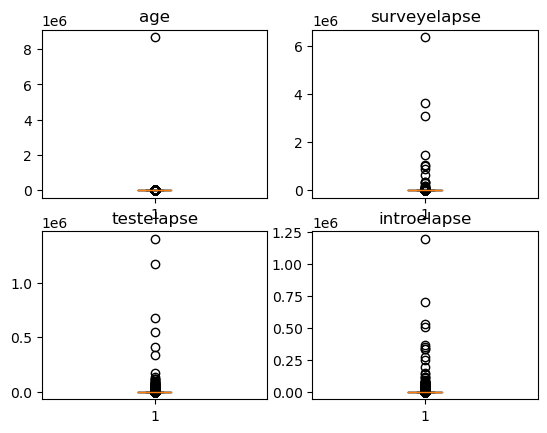

In [107]:
fig, axes = plt.subplots(2, 2)

# Boxplots
axes[0, 0].boxplot(outliers_pd['age'])
axes[0, 1].boxplot(outliers_pd['surveyelapse'])
axes[1, 0].boxplot(outliers_pd['testelapse'])
axes[1, 1].boxplot(outliers_pd['introelapse'])

# Setting titles
axes[0, 0].set_title('age')
axes[0, 1].set_title('surveyelapse')
axes[1, 0].set_title('testelapse')
axes[1, 1].set_title('introelapse')

{'whiskers': [<matplotlib.lines.Line2D at 0x3050871d0>,
 'caps': [<matplotlib.lines.Line2D at 0x305090510>,
 'boxes': [<matplotlib.lines.Line2D at 0x30505af10>],
 'medians': [<matplotlib.lines.Line2D at 0x30504e190>],
 'fliers': [<matplotlib.lines.Line2D at 0x305087a50>],
 'means': []}

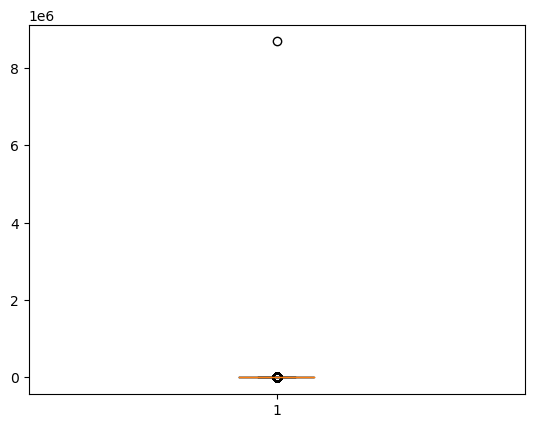

In [108]:
plt.boxplot(data['age'])

(array([7.e+03, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 1.e+00]),
 array([1.4000000e+01, 8.6754350e+05, 1.7350730e+06, 2.6026025e+06,
        3.4701320e+06, 4.3376615e+06, 5.2051910e+06, 6.0727205e+06,
        6.9402500e+06, 7.8077795e+06, 8.6753090e+06]),
 <BarContainer object of 10 artists>)

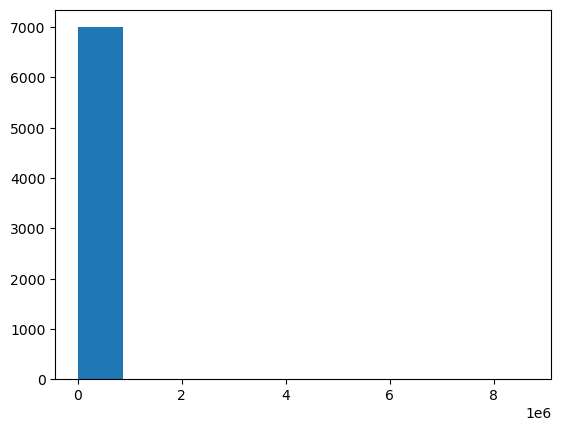

In [109]:
plt.hist(data['age'])

In [110]:
data['age'].head()

0    23
1    25
2    19
3    23
4    18
Name: age, dtype: int64

In [140]:
age_median = data['age'].median()
age_mean = data['age'].mean()
age_std = data['age'].std()
print(f"Median is {age_median} \nMean is {age_mean} \nStandard Deviation is {age_std}")

Median is 22.0 
Mean is 1235.1320255982193 
Standard Deviation is 102324.49207964304


Mean looks weird, so let's use IQR to detect outliers instead and replace them with the median.

In [129]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [130]:
data['isAgeOutlier'] = 0

for age in data['age']:
    if (age > upper_bound) or (age < lower_bound):
        idx = data[data['age']==age].index
        data.loc[idx, 'isAgeOutlier'] = 1

In [131]:
data['isAgeOutlier'].unique()

array([0, 1])

In [132]:
data['isAgeOutlier'].head()

0    0
1    0
2    0
3    0
4    0
Name: isAgeOutlier, dtype: int64

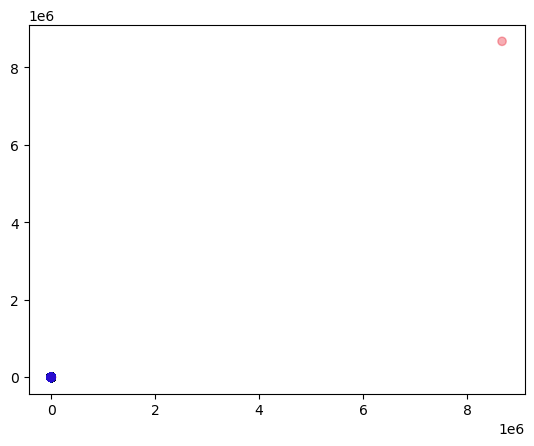

In [138]:
isOne = (data['isAgeOutlier']==1)
outliers_colour = {False: "#0011ff22",
                  True: "#e80c1e55"}
col = isOne.map(outliers_colour)
plt.scatter(data['age'], data['survey'], c=col)

In [143]:
ages_as_years = [1990, 1991, 2003, 1983, 1979, 1999, 1996]
def calculate_age(year):
    age = 2019 - year
    return age


for age in data['age']:
    if age in ages_as_years:
        new_age = calculate_age(age)
        idx = data[data['age']==age].index
        data.loc[idx, 'age'] = new_age

print(data['age'].unique())

[     23      25      19      18      22      20      15      51      53
      21      69      30      14      26      24      17      29      32
      16      40      28      59      33      38      31      50      64
      56      44      45      54      62      37      39      58      48
      34      35      27      43      68      42      36      60      57
      61      52      55      47      49      79      41      81      65
      46      72      70      71      77      67     255      66      63
      78 8675309      75      73      90]


In [144]:
age_mean = data['age'].mean()
age_median = data['age'].median()
age_std = data['age'].std()

print(f"Mean: {age_mean} \nMedian: {age_median} \nStandard deviation: {age_std}")

Mean: 1232.9464385086255 
Median: 22.0 
Standard deviation: 102324.49687632707


In [ ]:
age_lower_bound = 18
age_upper_bound = 90

for age in data['age']:
    if (age < age_lower_bound) or (age > age_upper_bound):
        idx = data[data['age']==age].index
        data = data.drop(idx)

print(data['age'].unique())

## Distribution Checks

([<matplotlib.patches.Wedge at 0x304b07210>,
 [Text(-0.3834539996974104, 1.0310009845369008, '1'),
  Text(-0.45327964986619307, -1.0022662116509673, '2'),
  Text(0.7813869055694713, -0.7742315569676596, '3')])

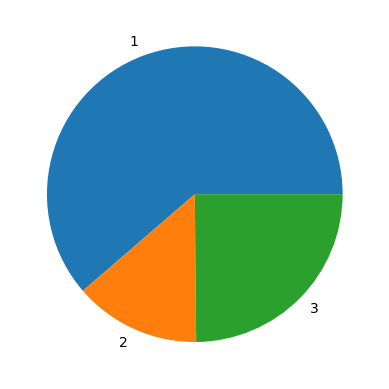

In [95]:
categories = {'1': 0,
              '2': 0,
              '3': 0}
for key in data['IE']:
    key = str(key)
    categories[key] += 1
categories = dict(categories)

plt.pie(categories.values(), labels = categories.keys())

In [96]:
print(categories)

{'1': 4294, '2': 967, '3': 1740}
